<a href="https://colab.research.google.com/github/tiaracantiq/gitgithub/blob/main/Koneksi_Google_Colab_dengan_Google_Drive_%26_Segmentasi_Citra_dengan_Color_Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
image_path='/content/drive/MyDrive/Praktikum DASD2/images/jahe.jpg'


In [6]:
import cv2
from matplotlib import pyplot as plt
# Membaca dan mengubah BGR ke RGB
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

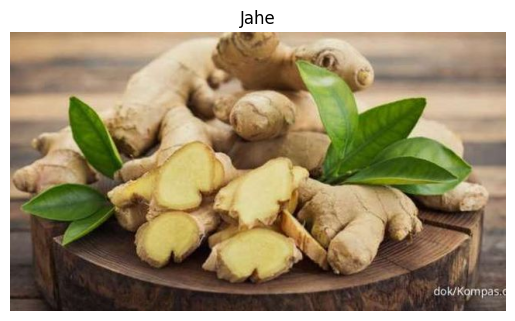

In [22]:
# Menampilkan gambar
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Jahe')
plt.show()

In [8]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


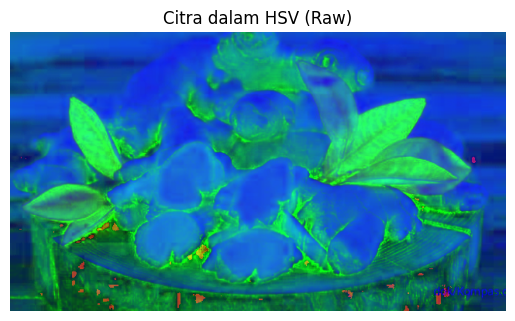

In [9]:
plt.imshow(hsv_img)
plt.title('Citra dalam HSV (Raw)')
plt.axis('off')
plt.show()

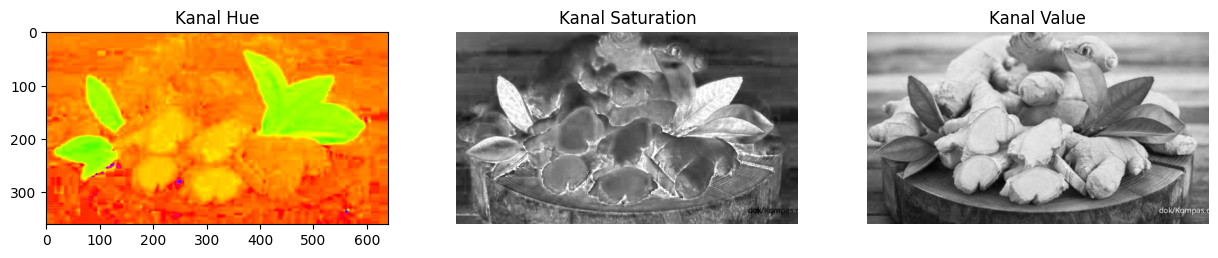

In [15]:
# Pisahkan kanal HSV
hue_channel = hsv_img[:, :, 0]
saturation_channel = hsv_img[:, :, 1]
value_channel = hsv_img[:, :, 2]

# Menampilkan kanal Hue, Saturation, dan Value
#Membuat satu baris dengan 3 kolom untuk menampilkan 3 gambar berdampingan
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(hue_channel, cmap='hsv')
ax[0].set_title('Kanal Hue')
ax[1].imshow(saturation_channel, cmap='gray')
ax[1].set_title('Kanal Saturation')
ax[1].axis('off')
ax[2].imshow(value_channel, cmap='gray')
ax[2].set_title('Kanal Value')
ax[2].axis('off')
plt.show()


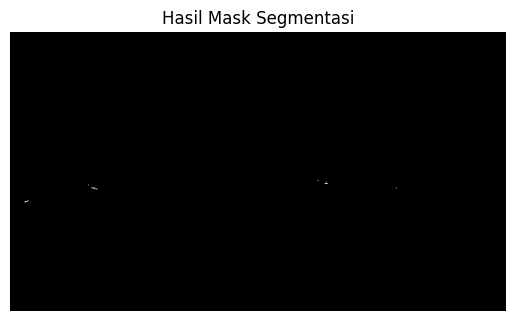

In [24]:
import cv2
import numpy as np # Added import statement for numpy
from matplotlib import pyplot as plt
# Tentukan batasan warna untuk segmentasi
lower_bound = np.array([27, 100, 70]) # Rentang warna hijau
upper_bound = np.array([35, 120, 90])
# Membuat mask untuk rentang warna yang ditentukan
mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
# Menampilkan hasil mask
plt.imshow(mask, cmap='gray')
plt.title('Hasil Mask Segmentasi')
plt.axis('off')
plt.show()


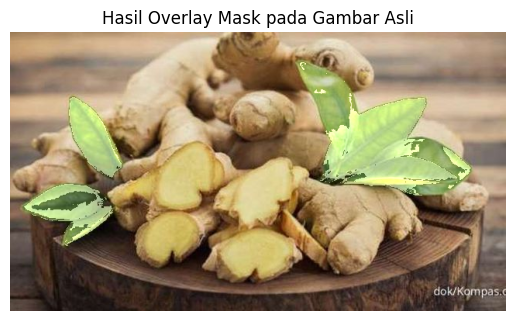

In [17]:
# Mengubah mask menjadi gambar 3D untuk overlay dengan gambar asli
mask_3d = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
# Menggabungkan gambar asli dengan mask menggunakan cv2.addWeighted
overlay = cv2.addWeighted(img, 1, mask_3d, 0.5, 0)
# Menampilkan gambar hasil overlay
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title('Hasil Overlay Mask pada Gambar Asli')
plt.axis('off')
plt.show()